## **1. Load Data** 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder  
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from transformers import AutoTokenizer, AutoModel
import torch
import joblib


tqdm.pandas()

In [15]:
df = pd.read_csv('../Data/vietnamese_news_for_modeling.csv')

In [16]:
X = np.load('../pipelines/X_features.npy')
y = np.array(df['category'])

## **2. Label Encoder + Train & Test Split**

In [17]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
    )

## **3. Training Model**

In [19]:
mlp = MLPClassifier(
    hidden_layer_sizes=(512, 256, 128, 64), 
    
    activation='relu',
    solver='adam',
    batch_size=64,
    learning_rate_init=0.0005, 
    alpha=0.005,
    early_stopping=True, 
    validation_fraction=0.1, 
    n_iter_no_change=10, 
    max_iter=200, 
    random_state=42,
    verbose=True
)

mlp.fit(X_train, y_train)

Iteration 1, loss = 1.35183761
Validation score: 0.717051
Iteration 2, loss = 0.80570754
Validation score: 0.752420
Iteration 3, loss = 0.72032258
Validation score: 0.779784
Iteration 4, loss = 0.66436602
Validation score: 0.769360
Iteration 5, loss = 0.62739227
Validation score: 0.791325
Iteration 6, loss = 0.59760470
Validation score: 0.794862
Iteration 7, loss = 0.56537570
Validation score: 0.788719
Iteration 8, loss = 0.53899832
Validation score: 0.794304
Iteration 9, loss = 0.51813161
Validation score: 0.802867
Iteration 10, loss = 0.49502047
Validation score: 0.797841
Iteration 11, loss = 0.47180480
Validation score: 0.789836
Iteration 12, loss = 0.45396280
Validation score: 0.807893
Iteration 13, loss = 0.43648925
Validation score: 0.806404
Iteration 14, loss = 0.41384100
Validation score: 0.814966
Iteration 15, loss = 0.39508203
Validation score: 0.804542
Iteration 16, loss = 0.37982718
Validation score: 0.813291
Iteration 17, loss = 0.36874410
Validation score: 0.798771
Iterat

,hidden_layer_sizes,"(512, ...)"
,activation,'relu'
,solver,'adam'
,alpha,0.005
,batch_size,64
,learning_rate,'constant'
,learning_rate_init,0.0005
,power_t,0.5
,max_iter,200
,shuffle,True
,random_state,42


## **4. Model Accuracy**

In [22]:
y_pred = mlp.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {round(acc, 4)}')
print('Classification Report:')
print(classification_report(y_test, y_pred, target_names=le.classes_))

Test Accuracy: 0.8114
Classification Report:
                    precision    recall  f1-score   support

      Bất động sản       0.81      0.90      0.85       798
         Công đoàn       0.75      0.64      0.69       797
           Du lịch       0.84      0.86      0.85       784
          Gia đình       0.81      0.87      0.84       798
          Giáo dục       0.82      0.94      0.88       776
          Giải trí       0.87      0.85      0.86       786
Khoa học công nghệ       0.84      0.80      0.82       769
        Kinh doanh       0.82      0.75      0.78       797
             Media       0.73      0.85      0.79       800
         Pháp luật       0.84      0.83      0.83       780
          Sức khỏe       0.85      0.78      0.81       791
          Thế giới       0.82      0.86      0.84       796
          Thể thao       0.96      0.94      0.95       794
           Thời sự       0.76      0.73      0.74       794
                Xe       0.96      0.91      0.93     

In [23]:
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(16, 14))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=classes, yticklabels=classes)
    plt.ylabel('Thực tế (True Label)')
    plt.xlabel('Dự đoán (Predicted Label)')
    plt.title('Ma trận nhầm lẫn (Confusion Matrix)', fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.show()

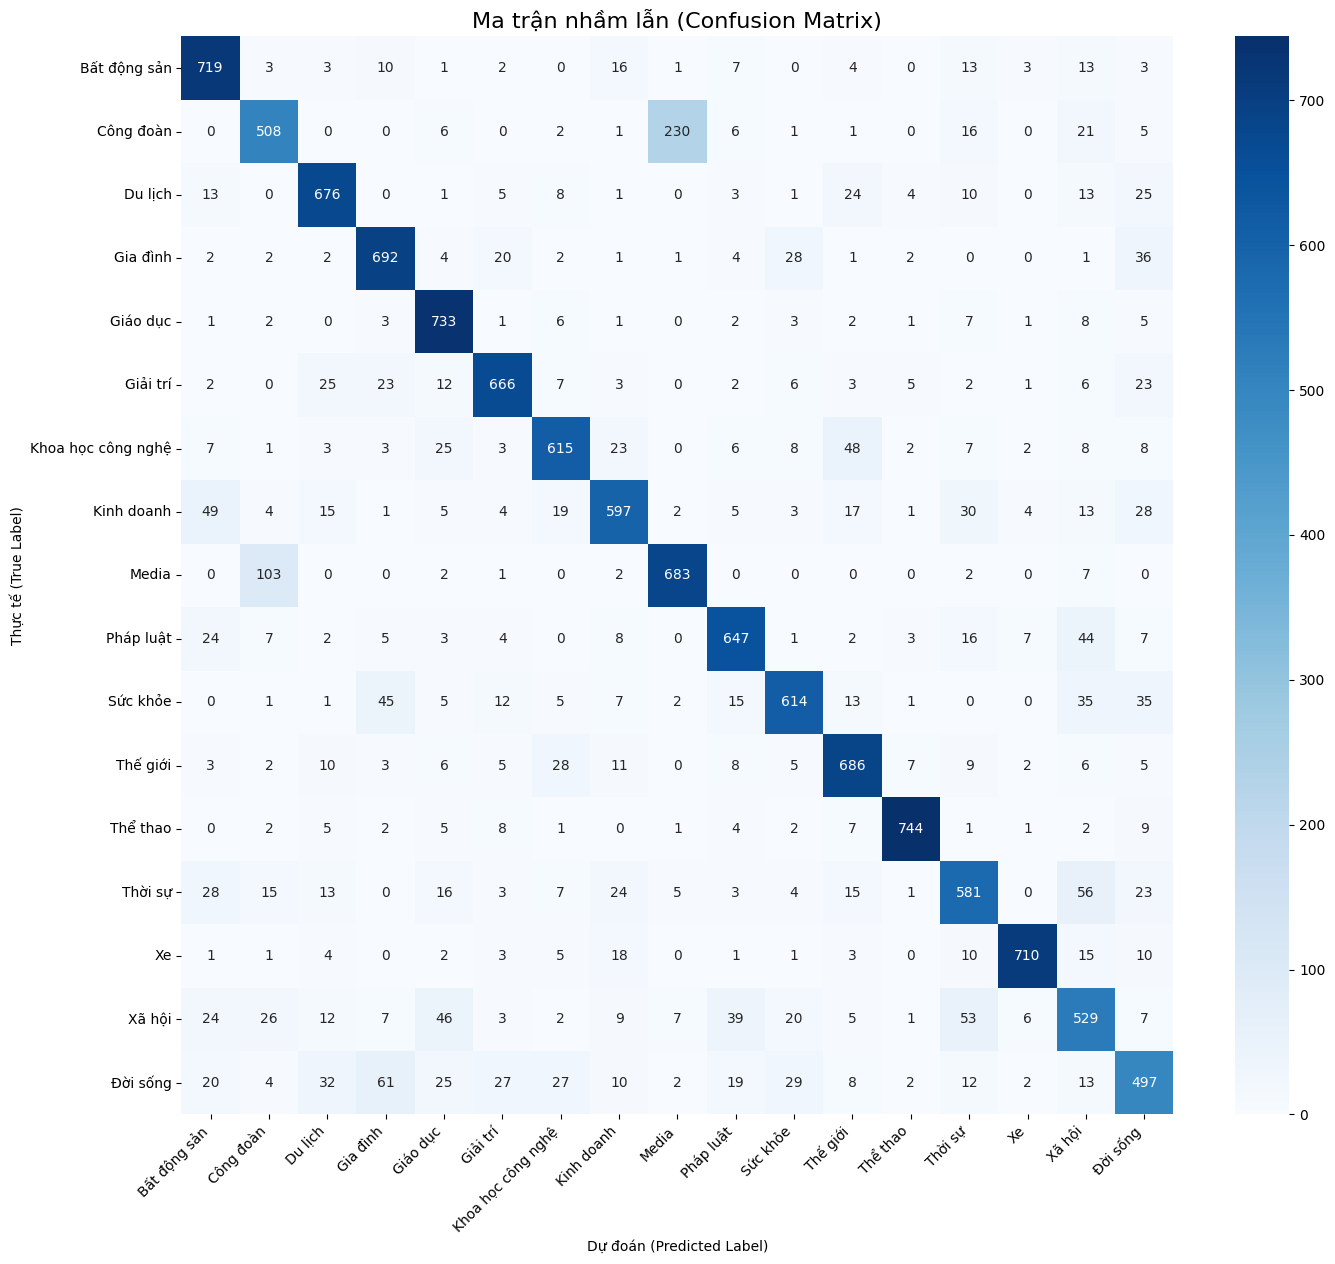

In [24]:
plot_confusion_matrix(y_test, y_pred, le.classes_)

## **5. Lưu Model**

In [ ]:
joblib.dump(le, '../models/label_encoder.pkl')
joblib.dump(mlp, '../models/news_classifier_mlp.pkl')

['../models/news_classifier_mlp.pkl']

## **6. Manual Test**

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('vinai/phobert-base', use_fast=True)
model = AutoModel.from_pretrained('vinai/phobert-base')

c:\Workplace\Data_Analyst\VNNewsClassifcation\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model.to(device)
model.eval()

RobertaModel(
  (embeddings): RobertaEmbeddings(
    (word_embeddings): Embedding(64001, 768, padding_idx=1)
    (position_embeddings): Embedding(258, 768, padding_idx=1)
    (token_type_embeddings): Embedding(1, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): RobertaEncoder(
    (layer): ModuleList(
      (0-11): 12 x RobertaLayer(
        (attention): RobertaAttention(
          (self): RobertaSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): RobertaSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
            (dr

In [ ]:
def get_embeddings_batch(text_list, batch_size=8, max_length=256):
    embeddings = []
    for i in range(0, len(text_list), batch_size):
        batch_texts = text_list[i:i+batch_size]
        inputs = tokenizer(
            batch_texts,
            return_tensors='pt',
            padding=True,
            truncation=True,
            max_length=max_length
        )
        inputs = {k:v.to(device) for k,v in inputs.items()}
        with torch.no_grad():
            outputs = model(**inputs)
        cls_embs = outputs.last_hidden_state.mean(dim=1).cpu().numpy()
        embeddings.append(cls_embs)
    return np.vstack(embeddings)

In [ ]:
def predict_real_article(title, content, token_count, model, label_encoder):
    title_emb = get_embeddings_batch([title], max_length=64)   
    content_emb = get_embeddings_batch([content], max_length=256)  

   
    token_feat  = np.array([[token_count]])            


    full_features = np.hstack([title_emb, content_emb,  token_feat])

    pred_class = model.predict(full_features)[0]

    return label_encoder.inverse_transform([pred_class])[0]

In [ ]:
title = input("Nhập tiêu đề bài báo: ").strip()
content = input("Nhập nội dung bài báo: ").strip()

token_count = len(content.split())

result = predict_real_article(title, content,  token_count, mlp, le)

print("\nDự đoán:", result)



Dự đoán: Thời sự
